In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def function_for_roots(x):
    a = 1.01
    b = -3.04
    c = 2.07
    return a*x**2 + b*x + c

In [25]:
def check_initial_values(f, x_min, x_max, tol):
    
    #check our initial guesses
    y_min = f(x_min)
    y_max = f(x_max)
    
    #check that x_min and x_max contain a 0 crossing the x-axis
    if(y_min*y_max>=0.0):
        print("No zero crossing found in the range = ",x_min,x_max)
        s = "f(%f) = %f, f(%f) = %f" % (x_min,y_min,x_max,y_max)
        print(s)
        return(0)
    
    #if x_min is a root, return flag == 1
    if(np.fabs(y_min)<tol):
        return 1
    
    #if x_max is a root, then return flag == 2
    if(np.fabs(y_max)<tol):
        return 2
    
    #if we reach this point, the bracket is valid 
    #and we will return 3
    return 3

def bisection_root_finding(f, x_min_start, x_max_start, tol):
    
    #this function uses bisection search to find a root
    
    x_min = x_min_start        #minimum x in bracket
    x_max = x_max_start        #maximum x in bracket
    x_mid = 0.0                #mid point
    
    y_min = f(x_min)  #function value at x_min
    y_max = f(x_max)  #function value at x_max
    y_mid = 0.0       #function value at mid point
    
    imax = 1000       #set a maximum number of interations
    i = 0             #iteration counter
    
    #check the initial value
    flag = check_initial_values(f,x_min,x_max,tol)
    if(flag==0):
        print("Error in bisection_root_finding().")
        raise ValueError('Initial values invalid',x_min,x_max)
    elif(flag==1):
        #lucky guess
        return x_min
    elif(flag==2):
        #another lucky guess
        return x_max
    
    #if we reach here. then we need to conudct the search
    
    #set a flag
    flag = 1
    
    #endter a while loop
    while(flag):
        x_mid = 0.5*(x_min+x_max)    #mid point
        y_mid = f(x_mid)            #function value at x_mid
        
        #check if x_mid is a root
        if(np.fabs(y_mid)<tol):
            flag = 0
        else:
            #x_mid is not a root
            
            #if the product of the function at the midpoint
            #and at one of the end points is greater than
            #zero, replace the end point
            if(f(x_min)*f(x_mid)>0):
                #replace x_min with x_mid
                x_min = x_mid
            else:
                #replace x_max with x_mid
                x_max = x_mid
                
        #print out the iteration
        print(x_min,f(x_min),x_max,f(x_max))
        
        #count the iteration
        i += 1
        
        #if we have exceeded the max number
        #of iteration, exit
        if(i>=imax):
            print("Exceeded max number of iterations = ",i)
            s = "Min bracket f(%f) = %f" % (x_min,f(x_min))
            print(s)
            s = "Max bracket f(%f) = %f" % (x_max,f(x_max))
            print(s)
            s = "Mid bracket f(%f) = %f" % (x_mid,f(x_mid))
            print(s)
            raise StopIteration('Stopping iterations after ',i)
            
    #we are done!
    return x_mid

In [30]:
x_min = 0
x_max = 1.5
tolerance = 1.0e-6

#print the inital guess
print(x_min,function_for_roots(x_min))
print(x_max,function_for_roots(x_max))

x_root = bisection_root_finding(function_for_roots,x_min,x_max,tolerance)
y_root = function_for_roots(x_root)

s = "Root found with y(%f) = %f" % (x_root,y_root)
print(s)


0 2.07
1.5 -0.2175000000000007
0.75 0.3581249999999996 1.5 -0.2175000000000007
0.75 0.3581249999999996 1.125 -0.07171875000000005
0.9375 0.10769531249999975 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.078125 -0.033522949218749876
1.03125 0.009111328124999485 1.0546875 -0.012760620117187482
1.03125 0.009111328124999485 1.04296875 -0.0019633483886720704
1.037109375 0.0035393142700193003 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.0411376953125 -0.0002512161433698701
1.040771484375 9.202301502186927e-05 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.0409088134765625

In [32]:
x_min = 1.5
x_max = 3.0
tolerance = 1.0e-6

#print the inital guess
print(x_min,function_for_roots(x_min))
print(x_max,function_for_roots(x_max))

x_root = bisection_root_finding(function_for_roots,x_min,x_max,tolerance)
y_root = function_for_roots(x_root)

s = "Root found with y(%f) = %f" % (x_root,y_root)
print(s)



1.5 -0.2175000000000007
3.0 2.0399999999999987
1.5 -0.2175000000000007 2.25 0.3431250000000001
1.875 -0.07921875000000034 2.25 0.3431250000000001
1.875 -0.07921875000000034 2.0625 0.09644531249999977
1.96875 -0.0002636718750004263 2.0625 0.09644531249999977
1.96875 -0.0002636718750004263 2.015625 0.045871582031249414
1.96875 -0.0002636718750004263 1.9921875 0.022249145507811985
1.96875 -0.0002636718750004263 1.98046875 0.01085403442382793
1.96875 -0.0002636718750004263 1.974609375 0.005260505676269123
1.96875 -0.0002636718750004263 1.9716796875 0.0024897480010981354
1.96875 -0.0002636718750004263 1.97021484375 0.001110870838165301
1.96875 -0.0002636718750004263 1.969482421875 0.0004230576753614379
1.96875 -0.0002636718750004263 1.9691162109375 7.955744862586656e-05
1.96893310546875 -9.20910760759952e-05 1.9691162109375 7.955744862586656e-05
1.969024658203125 -6.275279447631732e-06 1.9691162109375 7.955744862586656e-05
1.969024658203125 -6.275279447631732e-06 1.9690704345703125 3.663896

No handles with labels found to put in legend.


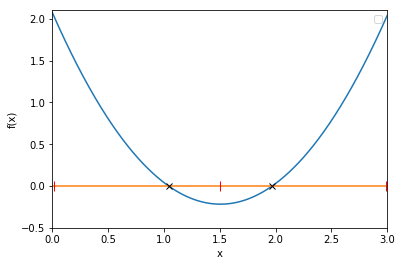

In [42]:
x = np.linspace(0,3,1000)
y = function_for_roots(x)
u = 0*x
plt.plot(x,y)
plt.plot(x,u)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([0,3])
plt.ylim([-0.5,2.1])
plt.plot([1.969030], [0], marker='x', markersize=6, color="black")
plt.plot([1.040869], [0], marker='x', markersize=6, color="black")
plt.plot([0.01], [0], marker='|', markersize=10, color="red")
plt.plot([1.5], [0], marker='|', markersize=10, color="red")
plt.plot([2.99], [0], marker='|', markersize=10, color="red")



